In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
file_path= "/content/drive/My Drive/DataSet1.csv"
Df= pd.read_csv(file_path)

In [2]:
import pandas as pd

In [37]:
DS.head()

,LearnerSignUpDate,Unnamed: 1,Month,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Age,...,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,ApplyDate,OpportunityStartDate,Opportunity Duration:,Interaction Features
0,05-01-2023,12,5,GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024,Poojitha,8/16/2000,24,...,India,Saint Louis University,Information Systems,3/11/2024,Started,1080,5/1/2023,11/3/2022,604,14496
1,04-09-2023,12,4,GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024,Emmanuel,1/27/2002,23,...,United States,Illinois Institute of Technology,Computer Science,3/11/2024,Started,1080,5/11/2023,11/3/2022,604,13892
2,08-29-2023,12,8,GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024,Amrutha Varshini,11/1/1999,25,...,United States,Saint Louis University,Information Systems,3/11/2024,Team Allocated,1070,10/9/2023,11/3/2022,604,15100
3,03-02-2024,12,3,GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024,Mor,5/12/1996,28,...,India,Saint Louis University,Mechanical Engineering,3/11/2024,Waitlisted,1040,3/2/2024,12/30/1899,45472,1273216
4,05-31-2023,12,5,GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,6/29/2024,Fardeen,9/9/2001,23,...,India,Illinois Institute of Technology,Computer Science and Engineering,3/11/2024,Withdraw,1110,6/14/2023,11/3/2022,604,13892


In [17]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8551 entries, 0 to 8550
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LearnerSignUpDate       8551 non-null   object
 1   Unnamed: 1              8551 non-null   int64 
 2   Month                   8551 non-null   int64 
 3   Opportunity Id          8551 non-null   object
 4   Opportunity Name        8551 non-null   object
 5   Opportunity Category    8551 non-null   object
 6   Opportunity End Date    8551 non-null   object
 7   First Name              8551 non-null   object
 8   Date of Birth           8551 non-null   object
 9   Age                     8551 non-null   int64 
 10  Gender                  8551 non-null   object
 11  Male                    8551 non-null   int64 
 12  Female                  8551 non-null   int64 
 13  Country                 8551 non-null   object
 14  Institution Name        8546 non-null   object
 15  Curr

In [18]:
DS.nunique()

,0
LearnerSignUpDate,414
Unnamed: 1,1
Month,12
Opportunity Id,23
Opportunity Name,22
Opportunity Category,5
Opportunity End Date,16
First Name,3020
Date of Birth,2618
Age,43


In [20]:
DS.isnull().sum()

,0
LearnerSignUpDate,0
Unnamed: 1,0
Month,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,0
First Name,0
Date of Birth,0
Age,0


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


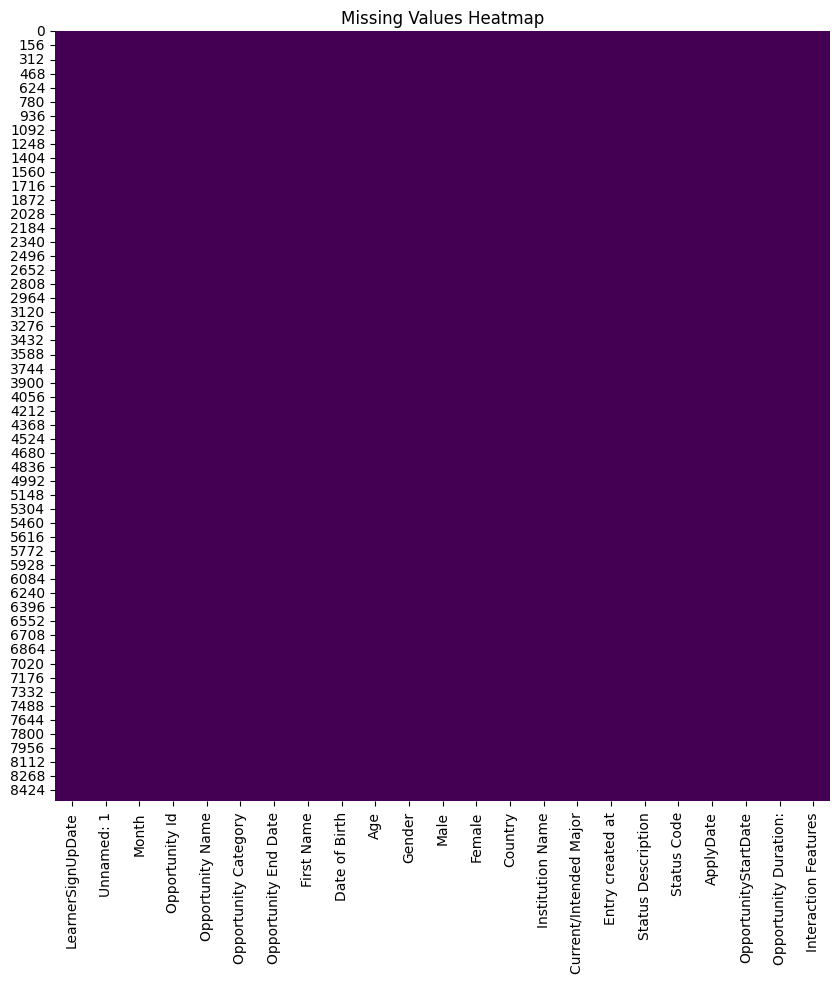

In [35]:
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
sns.heatmap(DS.isnull(), cbar=False, cmap="viridis") # Use a colormap to highlight missing values
plt.title("Missing Values Heatmap")
plt.show()

In [34]:
print(DS.isna().sum())

LearnerSignUpDate         0
Unnamed: 1                0
Month                     0
Opportunity Id            0
Opportunity Name          0
Opportunity Category      0
Opportunity End Date      0
First Name                0
Date of Birth             0
Age                       0
Gender                    0
Male                      0
Female                    0
Country                   0
Institution Name          5
Current/Intended Major    5
Entry created at          0
Status Description        0
Status Code               0
ApplyDate                 0
OpportunityStartDate      0
Opportunity Duration:     0
Interaction Features      0
dtype: int64


5. **missing values on Current/intented Major**


# Building a predictive model using logistic regression

In [40]:
# Define churn based on 'Status Description'
churn_statuses = ['Rejected', 'Dropped Out', 'Withdraw']
Df['Churn'] = Df['Status Description'].apply(lambda x: 1 if x in churn_statuses else 0)

In [42]:
# Select relevant features
features = ['Age', 'Male', 'Female', 'Interaction Features']
X = Df[features]
y = Df['Churn']

In [43]:
# Handle missing values (if any)
X.fillna(0, inplace=True)  # Fill NaN values with 0

<ipython-input-43-f574f50dc21f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Fill NaN values with 0


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
Df = Df.replace('#REF!', pd.NA)


In [51]:
Df['Interaction Features'] = pd.to_numeric(Df['Interaction Features'], errors='coerce')
Df['Age'].fillna(Df['Age'].median(), inplace=True)
Df['Interaction Features'].fillna(Df['Interaction Features'].mean(), inplace=True)

<ipython-input-51-53a155aabc33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['Age'].fillna(Df['Age'].median(), inplace=True)
<ipython-input-51-53a155aabc33>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [53]:
X = Df[features]
y = Df['Churn']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train[['Age', 'Interaction Features']] = scaler.fit_transform(X_train[['Age', 'Interaction Features']])
X_test[['Age', 'Interaction Features']] = scaler.transform(X_test[['Age', 'Interaction Features']])

In [56]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8849
Precision: 0.8953
Recall: 0.8712
F1-Score: 0.8831

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       857
           1       0.90      0.87      0.88       854

    accuracy                           0.88      1711
   macro avg       0.89      0.88      0.88      1711
weighted avg       0.89      0.88      0.88      1711


Confusion Matrix:
[[770  87]
 [110 744]]


#Interpretation of Metrics:

##Accuracy :
The proportion of correctly classified instances.
In this example, the model correctly predicts 88.49% of the cases.
##Precision :
Precision measures the proportion of true positives among all predicted positives.
Here, out of all participants predicted as churned, 89.53% were actually churned.
##Recall :
Recall measures the proportion of actual positives that were correctly identified.
In this case, the model identifies 87.12% of all churned participants.
##F1-Score :
The harmonic mean of precision and recall, balancing both metrics.
An F1-score of 88.31 indicates a reasonable trade-off between precision and recall.

##Confusion Matrix :
The matrix shows:
True Negatives (TN): 770(participants not churned and correctly predicted as not churned).
False Positives (FP): 87 (participants not churned but incorrectly predicted as churned).
False Negatives (FN): 110 (participants churned but incorrectly predicted as not churned).
True Positives (TP): 744 (participants churned and correctly predicted as churned).


In [76]:
Df = pd.read_csv(file_path)

Df = Df.replace('#REF!', pd.NA)
Df['Interaction Features'] = pd.to_numeric(Df['Interaction Features'], errors='coerce')


# Handle missing values using imputation
Df['Age'].fillna(Df['Age'].median(), inplace=True)
Df['Interaction Features'].fillna(Df['Interaction Features'].mean(), inplace=True)

churn_statuses = ['Rejected', 'Dropped Out', 'Withdraw']
Df['Churn'] = Df['Status Description'].apply(lambda x: 1 if x in churn_statuses else 0)

# Select relevant features
features = ['Age', 'Male', 'Female', 'Interaction Features', 'Opportunity Duration:']
X = Df[features]
y = Df['Churn']

# Handle missing values
X.fillna(0, inplace=True)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
X['Country_encoded'] = label_encoder.fit_transform(Df['Country'])
X['Major_encoded'] = label_encoder.fit_transform(Df['Current/Intended Major'])

# Scale numerical features
scaler = StandardScaler()
X[['Age', 'Interaction Features']] = scaler.fit_transform(X[['Age', 'Interaction Features']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier here

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)




<ipython-input-76-b301c0b8ad27>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df['Age'].fillna(Df['Age'].median(), inplace=True)
<ipython-input-76-b301c0b8ad27>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Logistic Regression Coefficients:
                 Feature  Coefficient
3   Interaction Features     2.195971
5        Country_encoded     0.022862
6          Major_encoded     0.001041
4  Opportunity Duration:     0.000003
0                    Age    -0.166858
2                 Female    -0.342710
1                   Male    -0.363557

Random Forest Feature Importances:
                 Feature  Importance
3   Interaction Features    0.431512
4  Opportunity Duration:    0.398847
6          Major_encoded    0.082520
0                    Age    0.050818
5        Country_encoded    0.029003
1                   Male    0.003665
2                 Female    0.003635


In [77]:
# Extract logistic regression coefficients
log_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(log_coefficients)

Logistic Regression Coefficients:
                 Feature  Coefficient
3   Interaction Features     2.195971
5        Country_encoded     0.022862
6          Major_encoded     0.001041
4  Opportunity Duration:     0.000003
0                    Age    -0.166858
2                 Female    -0.342710
1                   Male    -0.363557


## Interpretations

### Interaction Features :
The coefficient is positive (2.195971) , meaning higher interaction scores significantly increase the likelihood of retention (not churn).

Participants with lower engagement levels are more likely to drop out.
####Country_encoded :

The coefficient is slightly positive (0.022862) , indicating that participants from certain countries may have a slightly higher probability of churn compared to others.
However, this effect is minimal.

####Major_encoded :
The coefficient is very small (0.001041) , suggesting that the choice of major has negligible influence on churn in this model.

####Opportunity Duration: :
The coefficient is virtually zero (0.000003) , implying that the duration of the program does not significantly impact churn.
####Age :
The coefficient is negative (-0.166858) , meaning older participants are slightly less likely to churn.
Younger participants might be at higher risk of dropping out.

####Gender (Female/Male) :
Both Female and Male coefficients are negative , with Male having a slightly stronger negative effect (-0.363557 vs. -0.342710).

This suggests that males and females are both less likely to churn than participants who did not specify their gender. However, the difference between genders is minimal.


In [78]:
# Extract Random Forest feature importance
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(rf_importances)


Random Forest Feature Importances:
                 Feature  Importance
3   Interaction Features    0.431512
4  Opportunity Duration:    0.398847
6          Major_encoded    0.082520
0                    Age    0.050818
5        Country_encoded    0.029003
1                   Male    0.003665
2                 Female    0.003635


## Interpretation from Random Forest Features importance

### Interaction Features :
Accounts for 43.15% of the predictive power, making it the most important feature.
Higher engagement levels strongly reduce the likelihood of churn.

###Opportunity Duration: :
Accounts for 39.88% of the predictive power, making it the second most important feature.
Longer programs or internships may have a significant impact on whether students stay or leave.
### Major_encoded :
Accounts for 8.25% of the predictive power.
Certain majors might slightly influence churn rates, but the effect is much smaller compared to engagement and duration.
###Age :
Accounts for 5.08% of the predictive power.
Age plays a minor role in predicting churn, with younger participants potentially being more at risk.
###Country_encoded :
Accounts for 2.90% of the predictive power.
Regional differences have a small but noticeable effect on churn.
###Gender (Male/Female) :
Combined, gender accounts for only 0.73% of the predictive power.
Gender has almost no influence on churn in this model.


##Key Findings

###Engagement Levels (Interaction Features) :
Both models agree that engagement is the most critical factor influencing churn.
Participants with low interaction scores are significantly more likely to drop out.
###Program Duration (Opportunity Duration:) :
The Random Forest model highlights that longer programs may contribute to churn, possibly due to fatigue or competing priorities.
Logistic regression suggests this factor has minimal influence, but the Random Forest result should still be considered.
###Majors (Major_encoded) :
While the logistic regression coefficient is small, the Random Forest model indicates that certain majors slightly affect churn.
Investigating specific majors (e.g., Information Systems, Cyber Security) could reveal patterns worth addressing.
###Age :
Younger participants are slightly more prone to churn, as indicated by the negative logistic regression coefficient and moderate Random Forest importance.
###Gender :
Gender has almost no influence on churn, based on both models.
###Country :
Logistic regression suggests a slight regional effect, while Random Forest assigns minimal importance.
This could indicate that some countries face unique challenges (e.g., lack of resources, time zone differences).


# Insights and Recommendations

###Boost Engagement
##### Why :
Engagement (Interaction Features) is the strongest predictor of churn in both models.
#####How :
* Introduce interactive content such as quizzes, assignments, and discussion forums.
* Send personalized reminders to encourage participation.
* Gamify the experience by adding points, badges, or leaderboards.

###Optimize Program Duration
#####Why :
Longer durations (Opportunity Duration:) are associated with higher churn rates in the Random Forest model.
#####How :

* Break down long programs into shorter, modular segments.
* Offer flexible timelines for participants to complete their work.

###Target Specific Majors
#####Why :
Certain majors (Major_encoded) show slight predictive power in the Random Forest model.
#####How :
* Analyze churn rates by major to identify high-risk groups.
* Provide additional support or tailored content for challenging fields like Cyber Security, BlockChain or AI  .

###Focus on Younger Participants
####Why :
Younger participants (Age) are slightly more likely to churn, as shown by the logistic regression coefficient.
####How :
* Design programs specifically for younger demographics, incorporating engaging formats and relatable examples.
*  Address potential issues like balancing school/work responsibilities.

###Address Regional Differences
#####Why :
Some countries (Country_encoded) have slightly higher churn rates.
#####How :
* Investigate barriers faced by participants in high-churn regions (e.g., Ghana, Nigeria).
* Adapt communication strategies to suit local preferences and time zones.

#Actionable Strategies

###Early Intervention :
Monitor engagement metrics (Interaction Features) regularly.

Identify participants with declining engagement early and offer targeted support (e.g., mentorship, counseling).

###Improve Support Systems :
Provide additional resources for participants in longer programs or demanding majors.

Ensure timely feedback and assistance to keep participants motivated.

###Refine Program Content :
For high-churn majors, simplify complex topics and include practical applications.
Incorporate mid-program checkpoints to assess progress and address concerns.

